# Part 2b - Correcting Areas Under Diffraction Peaks with a Linear Background

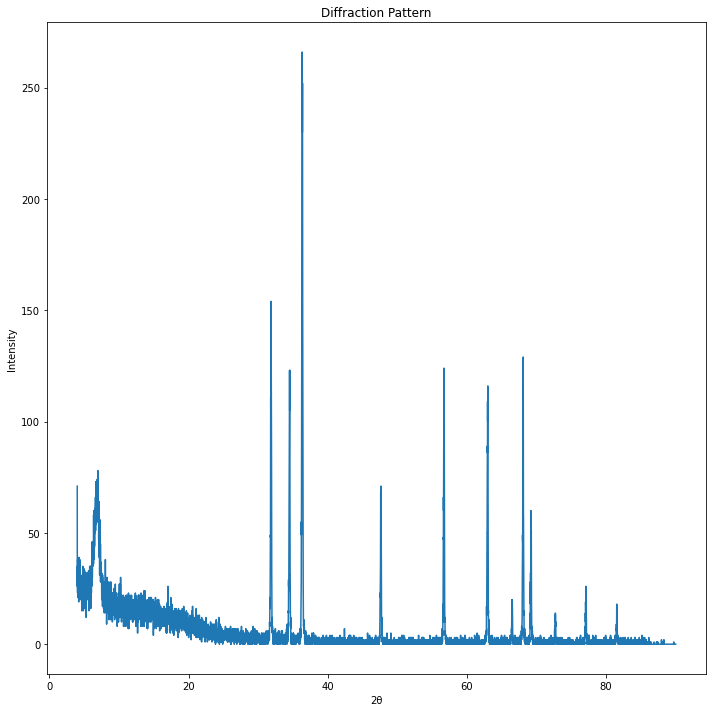

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('ZnO.xye')

def fig_setup(figsize=(10, 10)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    return fig, ax

fig, ax = fig_setup()
plt.plot(data[:,0], data[:,1])
plt.title('Diffraction Pattern')
plt.xlabel('2θ')
plt.ylabel('Intensity')
plt.tight_layout()
plt.show()
plt.clf()

Within range xmin and xmax the get_max_bgd function finds the maximum peak and cuts that peak out of the data and returns the trimmed down data:

In [2]:
def get_max_bgd(data, xmin=data[:,0][0], xmax=data[:,0][len(data[:,0])-1], width=1.5, peak_width=1.0):
    index_xmin = np.searchsorted(data[:,0], xmin)
    index_xmax = np.searchsorted(data[:,0], xmax)
    
    sliced_data_x = data[:,0][index_xmin:(index_xmax + 1)]
    sliced_data_y = data[:,1][index_xmin:(index_xmax + 1)]
    
    max_index = np.argmax(sliced_data_y)
    
    lower_bound_x = sliced_data_x[max_index] - (width/2)
    upper_bound_x = sliced_data_x[max_index] + (width/2)
    
    peak_start_x = sliced_data_x[max_index] - (peak_width/2)
    peak_end_x = sliced_data_x[max_index] + (peak_width/2)
    
    peak_start_i = np.searchsorted(sliced_data_x, peak_start_x)
    peak_end_i = np.searchsorted(sliced_data_x, peak_end_x)
    
    sliced_data_y[peak_start_i:(peak_end_i + 1)] = np.nan
    return sliced_data_x, sliced_data_y

No specified range provided, therefore, maximum peak will be removed:

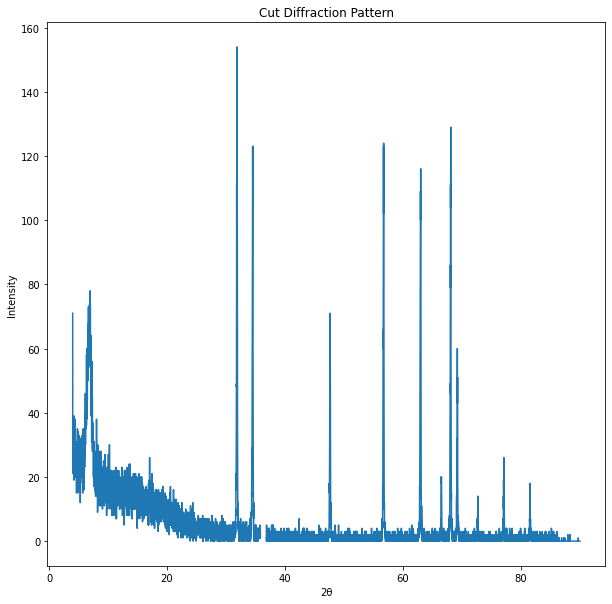

<Figure size 432x288 with 0 Axes>

In [3]:
fig, ax = fig_setup()
sliced_data = get_max_bgd(data)

plt.plot(sliced_data[0], sliced_data[1])
plt.xlabel('2θ')
plt.ylabel('Intensity')
plt.title('Cut Diffraction Pattern')
plt.show()
plt.clf()    

X-range 40 to 50 specified:

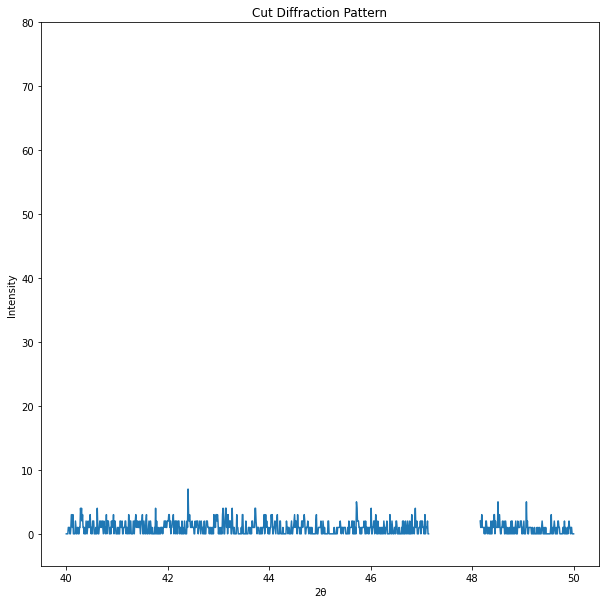

<Figure size 432x288 with 0 Axes>

In [4]:
data = np.loadtxt('ZnO.xye')

fig, ax = fig_setup()
sliced_data1 = get_max_bgd(data, xmin = 40, xmax = 50)

plt.plot(sliced_data1[0], sliced_data1[1])
ax.set_ylim(-5, 80)
plt.xlabel('2θ')
plt.ylabel('Intensity')
plt.title('Cut Diffraction Pattern')
plt.show()
plt.clf()

Function overlay displays the original diffraction pattern and the corresponding trimmed data:

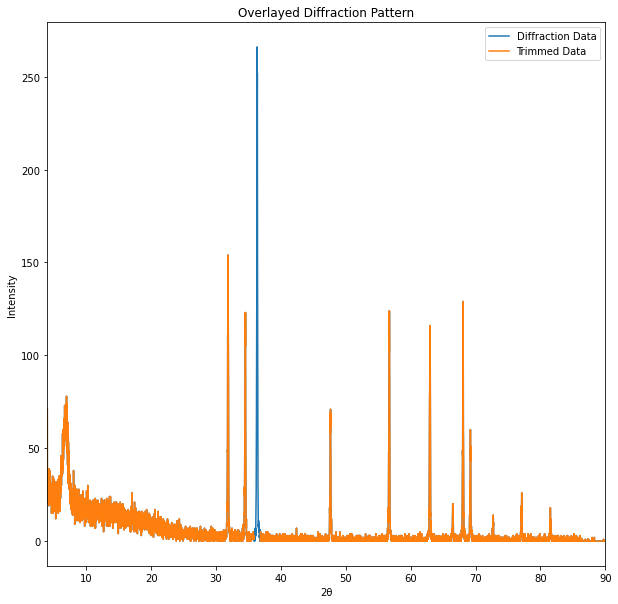

<Figure size 432x288 with 0 Axes>

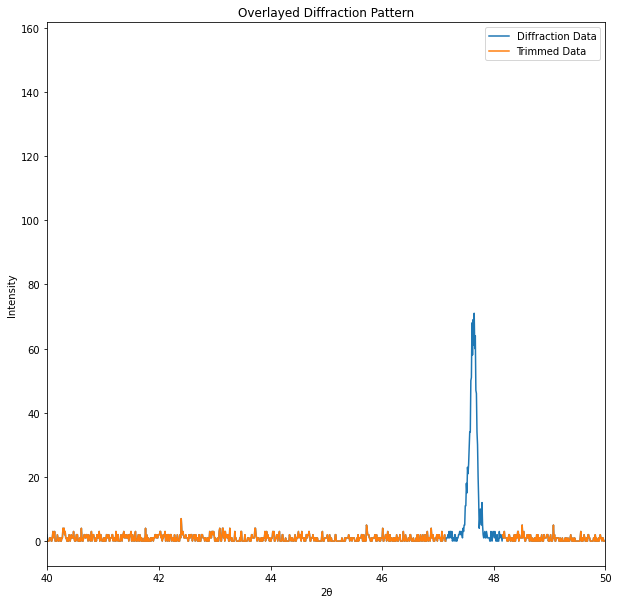

<Figure size 432x288 with 0 Axes>

In [4]:
data = np.loadtxt('ZnO.xye')

def overlay(data, xmin=data[:,0][0], xmax=data[:,0][len(data[:,0])-1], width=1.5, peak_width=1.0):
    index_xmin = np.searchsorted(data[:,0], xmin)
    index_xmax = np.searchsorted(data[:,0], xmax)
    
    plt.plot(data[:,0], data[:,1])
    trimmed_data = get_max_bgd(data, xmin, xmax, width, peak_width)
    plt.plot(trimmed_data[0], trimmed_data[1])
    ax.set_xlim(data[:,0][index_xmin], data[:,0][index_xmax])
    plt.legend(['Diffraction Data', 'Trimmed Data'])
    plt.xlabel('2θ')
    plt.ylabel('Intensity')
    plt.title('Overlayed Diffraction Pattern')
    plt.show()
    plt.clf()
        
fig, ax = fig_setup()
overlay(data)

fig, ax = fig_setup()
overlay(data, xmin = 40, xmax = 50)

Function lnr_bgd fits a linear background to the data surrounding the maximum peak in the range specified:

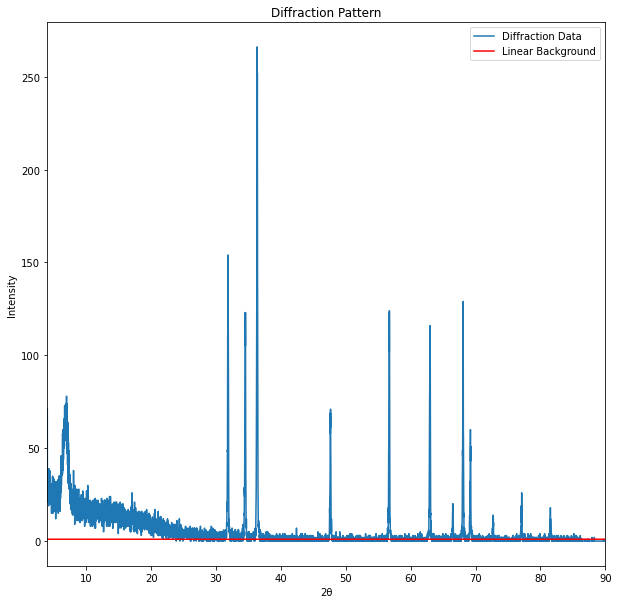

<Figure size 432x288 with 0 Axes>

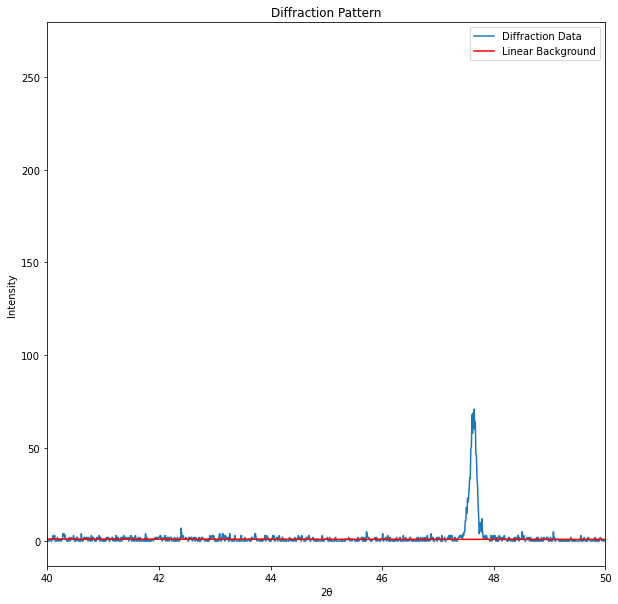

(array([1.70689153, 1.70671196, 1.7065324 , ..., 0.1629653 , 0.16278573,
        0.16260616]),
 715,
 815)

<Figure size 432x288 with 0 Axes>

In [5]:
def lnr_bgd(data, xmin=data[:,0][0], xmax=data[:,0][len(data[:,0])-1], width=1.5, peak_width=1.0):
    index_xmin = np.searchsorted(data[:,0], xmin)
    index_xmax = np.searchsorted(data[:,0], xmax)
    
    sliced_data_x = data[:,0][index_xmin:(index_xmax + 1)]
    sliced_data_y = data[:,1][index_xmin:(index_xmax + 1)]
    
    max_index = np.argmax(sliced_data_y)
    
    lower_bound_x = sliced_data_x[max_index] - (width/2)
    upper_bound_x = sliced_data_x[max_index] + (width/2)
    
    lower_bound_i = np.searchsorted(sliced_data_x, lower_bound_x)
    upper_bound_i = np.searchsorted(sliced_data_x, upper_bound_x)
    
    peak_start_x = sliced_data_x[max_index] - (peak_width/2)
    peak_end_x = sliced_data_x[max_index] + (peak_width/2)
    
    peak_start_i = np.searchsorted(sliced_data_x, peak_start_x)
    peak_end_i = np.searchsorted(sliced_data_x, peak_end_x)
    
    x_lower = sliced_data_x[lower_bound_i:(peak_start_i + 1)]
    x_upper = sliced_data_x[peak_end_i:(upper_bound_i + 1)]
    
    y_lower = sliced_data_y[lower_bound_i:(peak_start_i + 1)]
    y_upper = sliced_data_y[peak_end_i:(upper_bound_i + 1)]
    
    combined_x = np.concatenate((x_lower, x_upper))
    combined_y = np.concatenate((y_lower, y_upper))
    
    nan_indexes = []                             # indicies of not null values
    for i in range(0, len(combined_y), 1):
        if np.isnan(combined_y[i]) == False:
            nan_indexes.append(i)
    
    clean_x = []                                 # x data without null values
    for i in nan_indexes:
        clean_x.append(combined_x[i])
    
    clean_y = combined_y[np.logical_not(np.isnan(combined_y))]    # y data without null values
    
    counter = 0
    for i in clean_x:
        if np.isfinite(i) == False:
            counter += 1
    #print(counter)
    
    coef = np.polyfit(clean_x, clean_y, 1) 
    y_line = coef[1] + coef[0] * pow(data[:,0], 1)
    
    plt.plot(data[:,0], data[:,1])
    plt.plot(data[:,0], y_line, 'r')
    ax.set_xlim(data[:,0][index_xmin], data[:,0][index_xmax])
    plt.legend(['Diffraction Data', 'Linear Background'])
    plt.xlabel('2θ')
    plt.ylabel('Intensity')
    plt.title('Diffraction Pattern')
    plt.show()
    plt.clf()
    
    return y_line, peak_start_i, peak_end_i

data = np.loadtxt('ZnO.xye')

fig, ax = fig_setup()
lnr_bgd(data, width = 1.0)

fig, ax = fig_setup()
lnr_bgd(data, xmin = 40, xmax = 50)

Function area_peak calls the lnr_bgd function and removes the area under the linear background from the calculated area of the peak:

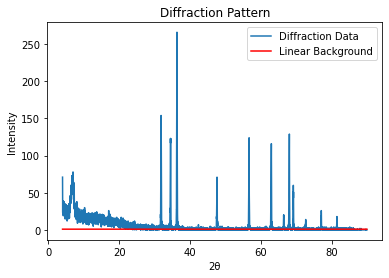

area = 41.30000000000004


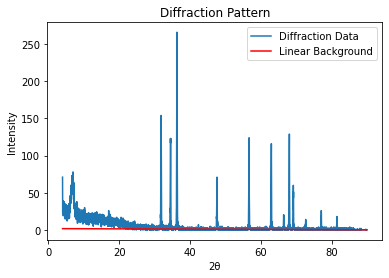

area = 13.965478039310836


<Figure size 432x288 with 0 Axes>

In [6]:
data = np.loadtxt('ZnO.xye')

def area_peak(data, xmin=data[:,0][0], xmax=data[:,0][len(data[:,0])-1], width=1.5, peak_width=1.0):
    
    linear_bgd = lnr_bgd(data, xmin, xmax, width, peak_width)
    
    x = data[:,0][linear_bgd[1]:(linear_bgd[2]+1)]
    y = data[:,1][linear_bgd[1]:(linear_bgd[2]+1)]

    area_peak = np.trapz(y, x, dx = 0.1)
    #print(area_peak)
    
    y_bgd = linear_bgd[0][linear_bgd[1]:(linear_bgd[2]+1)]
    x_bgd = data[:,0][linear_bgd[1]:(linear_bgd[2]+1)]
    
    area_bgd = np.trapz(y_bgd, x_bgd, dx = 0.1)
    #print(area_bgd)
    
    area_corrected_peak = area_peak - area_bgd
    print("area =", area_corrected_peak)
    
area_peak(data, width = 1.0)
area_peak(data, xmin = 40, xmax = 50)